## Bibliotecas

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

## Lloyd (k-means)

Text(0, 0.5, 'Salario')

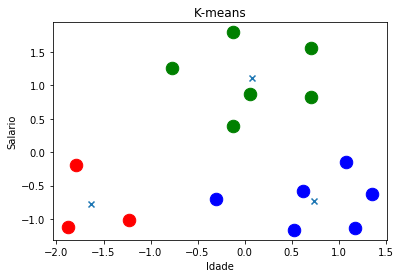

In [2]:
x = [20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]  
y = [1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]  

base = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                 [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                 [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

scaler = StandardScaler()
base = scaler.fit_transform(base)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(base)
centroides = kmeans.cluster_centers_
rotulos = kmeans.labels_

cores = ['g.', 'r.', 'b.']
for i in range(len(x)):
    plt.plot(base[i][0], base[i][1], cores[rotulos[i]], markersize = 25)
plt.scatter(centroides[:, 0], centroides[:, 1], marker = 'x')
plt.title('K-means')
plt.xlabel('Idade')
plt.ylabel('Salario')

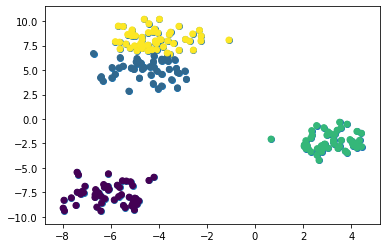

In [26]:
x, y = datasets.samples_generator.make_blobs(n_samples = 200, centers = 4)
plt.scatter(x[:,0],x[:,1])

kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)

previsoes = kmeans.predict(x)
plt.scatter(x[:,0],x[:,1], c = previsoes)

## Banco de dados - cartao de credito

In [12]:
df = pd.read_csv('../dataset/credit-card-clients.csv', header = 1)
df['BILL_TOTAL'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']

x = df.iloc[:, [1,25]].values
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Elbow Method

Text(0, 0.5, 'WCSS')

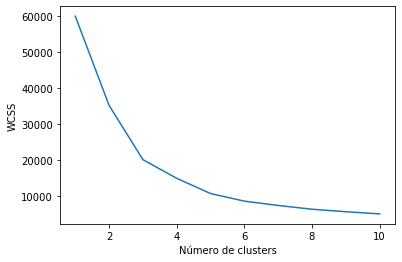

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

## KMeans++

[[  15661  200000       2 ...       0     288       0]
 [  18035  500000       1 ...       0   14302       0]
 [   9118  360000       2 ...       0  148480       0]
 ...
 [  10517  350000       2 ...       0 1401141       3]
 [  12985  360000       1 ...       0 1950128       3]
 [  29138  330000       2 ...       0 1126557       3]]


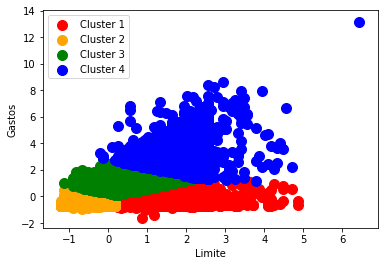

In [17]:
kmeans = KMeans(n_clusters = 4)
previsoes = kmeans.fit_predict(x)

plt.scatter(x[previsoes == 0, 0], x[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[previsoes == 1, 0], x[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[previsoes == 2, 0], x[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[previsoes == 3, 0], x[previsoes == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')

plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()

lista_clientes = np.column_stack((df, previsoes))
lista_clientes = lista_clientes[lista_clientes[:, 26].argsort()]
print(lista_clientes)

## KMeans - Mais atributos e dimensões

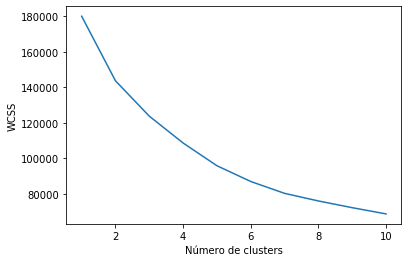

In [7]:
x = df.iloc[:, [1,2,3,4,5,25]].values
scaler = StandardScaler()
x = scaler.fit_transform(x)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes = kmeans.fit_predict(x)

lista_clientes = np.column_stack((df, previsoes))
lista_clientes = lista_clientes[lista_clientes[:, 26].argsort()]

## Agrupamento Hierárquico

Text(0, 0.5, 'Distância Euclidiana')

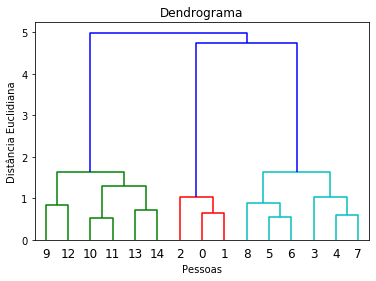

In [24]:
x = [20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]  
y = [1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]  
plt.scatter(x,y)

base = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                 [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                 [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

scaler = StandardScaler()
base = scaler.fit_transform(base)

dendrograma = dendrogram(linkage(base, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

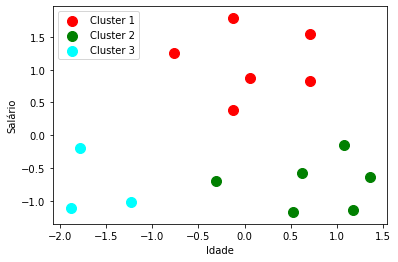

In [25]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(base)

plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(base[previsoes == 2, 0], base[previsoes == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.legend()

## Agrupamento Hierárquico - Cartao de crétido 

In [2]:
df = pd.read_csv('../dataset/credit-card-clients.csv', header = 1)
df['BILL_TOTAL'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']

x = df.iloc[:, [1,25]].values
scaler = StandardScaler()
x = scaler.fit_transform(x)

'''engrograma = dendrogam(linkage(x, method = 'ward'))
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(x)

plt.scatter(x[previsoes == 0, 0], x[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[previsoes == 1, 0], x[previsoes == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[previsoes == 2, 0], x[previsoes == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.legend()'''


## DBSCAN

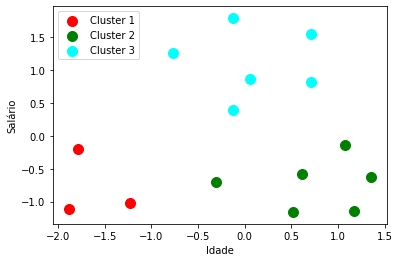

In [11]:
x = [20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]  
y = [1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500] 

base = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                 [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                 [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

scaler = StandardScaler()
base = scaler.fit_transform(base)

dbscan = DBSCAN(eps = 0.95, min_samples = 2)
previsoes = dbscan.fit_predict(base)

plt.scatter(base[previsoes == 0, 0], base[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(base[previsoes == 1, 0], base[previsoes == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(base[previsoes == 2, 0], base[previsoes == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.legend()

## DBSCAN - cartão de crétido

[-1  0  1  2] [   42 29931    18     9]


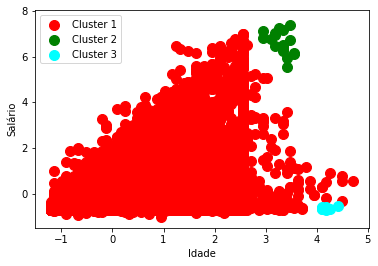

In [20]:
df = pd.read_csv('../dataset/credit-card-clients.csv', header = 1)
df['BILL_TOTAL'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']

x = df.iloc[:, [1,25]].values
scaler = StandardScaler()
x = scaler.fit_transform(x)

dbscan = DBSCAN(eps = 0.37, min_samples = 4)
previsoes = dbscan.fit_predict(x)
unicos, quantidade = np.unique(previsoes, return_counts = True)
print(unicos, quantidade)

plt.scatter(x[previsoes == 0, 0], x[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[previsoes == 1, 0], x[previsoes == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[previsoes == 2, 0], x[previsoes == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.legend()

## Comparação entre as técnicas

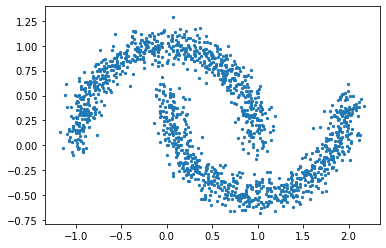

In [30]:
x, y = datasets.make_moons(n_samples = 1500, noise = 0.09)
plt.scatter(x[:, 0], x[:, 1], s = 5)

### Kmeans

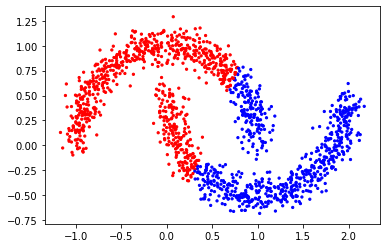

In [31]:
cores = np.array(['red', 'blue'])
kmeans = KMeans(n_clusters = 2)
previsoes = kmeans.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], s = 5, color = cores[previsoes])

### Hierárquico

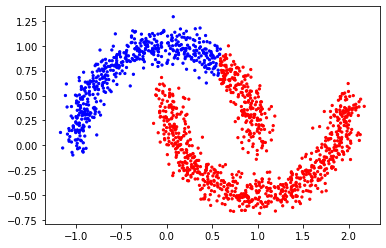

In [32]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], s = 5, color = cores[previsoes])

### DBSCAN

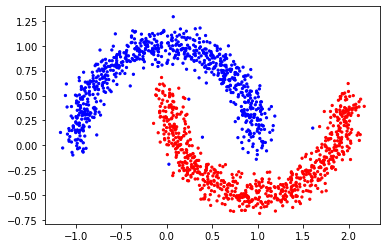

In [33]:
dbscan = DBSCAN(eps = 0.1)
previsoes = dbscan.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], s = 5, color = cores[previsoes])